In [1]:
import sklearn
import pandas as pd
import numpy as np


In [39]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline


In [30]:
df = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', sep=",", names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "eval"])

In [16]:
#show dataframe first 5 entries
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [17]:
# check the rows and columns of dataframe
df.shape


(1728, 7)

In [18]:
# check if dataframe contain any null value
df[pd.isnull(df).any(axis=1)]

,buying,maint,doors,persons,lug_boot,safety,eval


In [ ]:
# check the distribution of our data
# this help us in two things
# 1. we know if our data is uniformly distributed or skewed
# 2. it help us in choosing our model

In [19]:
# we are checking the unique count of all the different type of our label
df['eval'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: eval, dtype: int64

In [22]:
car_counts = pd.DataFrame(df['eval'].value_counts())
car_counts

,eval
unacc,1210
acc,384
good,69
vgood,65


In [23]:
car_counts['percentage'] = car_counts['eval']/car_counts.sum()[0]
car_counts

,eval,percentage
unacc,1210,0.700231
acc,384,0.222222
good,69,0.039931
vgood,65,0.037616


([<matplotlib.patches.Wedge at 0x2d872379908>,
 [Text(-0.6472108044769336, 0.8894482416466517, 'Unacceptable'),
  Text(0.413550280063065, -1.0193018031278867, 'Acceptable'),
  Text(1.0287904004528587, -0.3893460054194043, 'Good'),
  Text(1.0923282302660486, -0.12968823140070448, 'Very Good')])

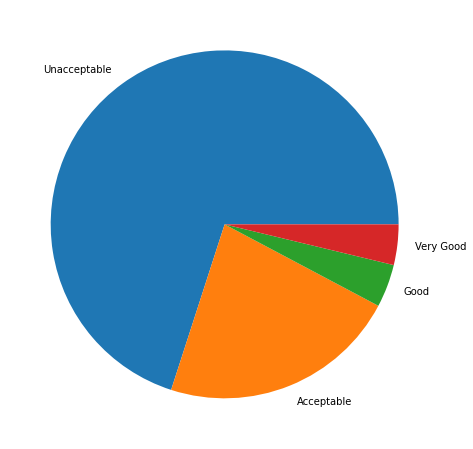

In [24]:
plt.figure(figsize=(8,8))
plt.pie(car_counts['percentage'], labels = ['Unacceptable', 'Acceptable', 'Good', 'Very Good'])

In [27]:
df.head()


,buying,maint,doors,persons,lug_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [40]:
# convert the values to numbers, integers preferably
le = preprocessing.LabelEncoder()